In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
# Preamble: Environment Check

import sys
import pandas as pd
import numpy as np
import matplotlib
import seaborn as sns

print("Python version:", sys.version)
print("Pandas version:", pd.__version__)
print("NumPy version:", np.__version__)
print("Matplotlib version:", matplotlib.__version__)
print("Seaborn version:", sns.__version__)

Python version: 3.12.12 (main, Oct 10 2025, 08:52:57) [GCC 11.4.0]
Pandas version: 2.2.2
NumPy version: 2.0.2
Matplotlib version: 3.10.0
Seaborn version: 0.13.2


In [3]:
df1 = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/OnlineNewsPopularity.csv')
df1

,url,timedelta,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,...,min_positive_polarity,max_positive_polarity,avg_negative_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity,shares
0,http://mashable.com/2013/01/07/amazon-instant-...,731.0,12.0,219.0,0.663594,1.0,0.815385,4.0,2.0,1.0,...,0.100000,0.70,-0.350000,-0.600,-0.200000,0.500000,-0.187500,0.000000,0.187500,593
1,http://mashable.com/2013/01/07/ap-samsung-spon...,731.0,9.0,255.0,0.604743,1.0,0.791946,3.0,1.0,1.0,...,0.033333,0.70,-0.118750,-0.125,-0.100000,0.000000,0.000000,0.500000,0.000000,711
2,http://mashable.com/2013/01/07/apple-40-billio...,731.0,9.0,211.0,0.575130,1.0,0.663866,3.0,1.0,1.0,...,0.100000,1.00,-0.466667,-0.800,-0.133333,0.000000,0.000000,0.500000,0.000000,1500
3,http://mashable.com/2013/01/07/astronaut-notre...,731.0,9.0,531.0,0.503788,1.0,0.665635,9.0,0.0,1.0,...,0.136364,0.80,-0.369697,-0.600,-0.166667,0.000000,0.000000,0.500000,0.000000,1200
4,http://mashable.com/2013/01/07/att-u-verse-apps/,731.0,13.0,1072.0,0.415646,1.0,0.540890,19.0,19.0,20.0,...,0.033333,1.00,-0.220192,-0.500,-0.050000,0.454545,0.136364,0.045455,0.136364,505
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39639,http://mashable.com/2014/12/27/samsung-app-aut...,8.0,11.0,346.0,0.529052,1.0,0.684783,9.0,7.0,1.0,...,0.100000,0.75,-0.260000,-0.500,-0.125000,0.100000,0.000000,0.400000,0.000000,1800
39640,http://mashable.com/2014/12/27/seth-rogen-jame...,8.0,12.0,328.0,0.696296,1.0,0.885057,9.0,7.0,3.0,...,0.136364,0.70,-0.211111,-0.400,-0.100000,0.300000,1.000000,0.200000,1.000000,1900
39641,http://mashable.com/2014/12/27/son-pays-off-mo...,8.0,10.0,442.0,0.516355,1.0,0.644128,24.0,1.0,12.0,...,0.136364,0.50,-0.356439,-0.800,-0.166667,0.454545,0.136364,0.045455,0.136364,1900
39642,http://mashable.com/2014/12/27/ukraine-blasts/,8.0,6.0,682.0,0.539493,1.0,0.692661,10.0,1.0,1.0,...,0.062500,0.50,-0.205246,-0.500,-0.012500,0.000000,0.000000,0.500000,0.000000,1100


## Univariate analysis

### Subtask:
Analyze the distribution of individual features, including the 'shares' column, using visualizations and descriptive statistics.


**Reasoning**:
Generate descriptive statistics for all columns in the DataFrame and display the result.



In [4]:
display(df1.describe())

,timedelta,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,num_videos,...,min_positive_polarity,max_positive_polarity,avg_negative_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity,shares
count,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,...,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000
mean,354.530471,10.398749,546.514731,0.548216,0.996469,0.689175,10.883690,3.293638,4.544143,1.249874,...,0.095446,0.756728,-0.259524,-0.521944,-0.107500,0.282353,0.071425,0.341843,0.156064,3395.380184
std,214.163767,2.114037,471.107508,3.520708,5.231231,3.264816,11.332017,3.855141,8.309434,4.107855,...,0.071315,0.247786,0.127726,0.290290,0.095373,0.324247,0.265450,0.188791,0.226294,11626.950749
min,8.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,-1.000000,-1.000000,-1.000000,0.000000,-1.000000,0.000000,0.000000,1.000000
25%,164.000000,9.000000,246.000000,0.470870,1.000000,0.625739,4.000000,1.000000,1.000000,0.000000,...,0.050000,0.600000,-0.328383,-0.700000,-0.125000,0.000000,0.000000,0.166667,0.000000,946.000000
50%,339.000000,10.000000,409.000000,0.539226,1.000000,0.690476,8.000000,3.000000,1.000000,0.000000,...,0.100000,0.800000,-0.253333,-0.500000,-0.100000,0.150000,0.000000,0.500000,0.000000,1400.000000
75%,542.000000,12.000000,716.000000,0.608696,1.000000,0.754630,14.000000,4.000000,4.000000,1.000000,...,0.100000,1.000000,-0.186905,-0.300000,-0.050000,0.500000,0.150000,0.500000,0.250000,2800.000000
max,731.000000,23.000000,8474.000000,701.000000,1042.000000,650.000000,304.000000,116.000000,128.000000,91.000000,...,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.500000,1.000000,843300.000000


**Reasoning**:
Create histograms for a selection of numerical features, including 'shares', to visualize their distributions. Given the large number of numerical columns, select a few representative ones.



In [5]:
display(df1.columns)

Index(['url', ' timedelta', ' n_tokens_title', ' n_tokens_content',
       ' n_unique_tokens', ' n_non_stop_words', ' n_non_stop_unique_tokens',
       ' num_hrefs', ' num_self_hrefs', ' num_imgs', ' num_videos',
       ' average_token_length', ' num_keywords', ' data_channel_is_lifestyle',
       ' data_channel_is_entertainment', ' data_channel_is_bus',
       ' data_channel_is_socmed', ' data_channel_is_tech',
       ' data_channel_is_world', ' kw_min_min', ' kw_max_min', ' kw_avg_min',
       ' kw_min_max', ' kw_max_max', ' kw_avg_max', ' kw_min_avg',
       ' kw_max_avg', ' kw_avg_avg', ' self_reference_min_shares',
       ' self_reference_max_shares', ' self_reference_avg_sharess',
       ' weekday_is_monday', ' weekday_is_tuesday', ' weekday_is_wednesday',
       ' weekday_is_thursday', ' weekday_is_friday', ' weekday_is_saturday',
       ' weekday_is_sunday', ' is_weekend', ' LDA_00', ' LDA_01', ' LDA_02',
       ' LDA_03', ' LDA_04', ' global_subjectivity',
       ' global_sent

**Reasoning**:
The column names have leading spaces. Correct the column names and then create histograms for a selection of numerical features, including 'shares', to visualize their distributions, using the corrected column names.



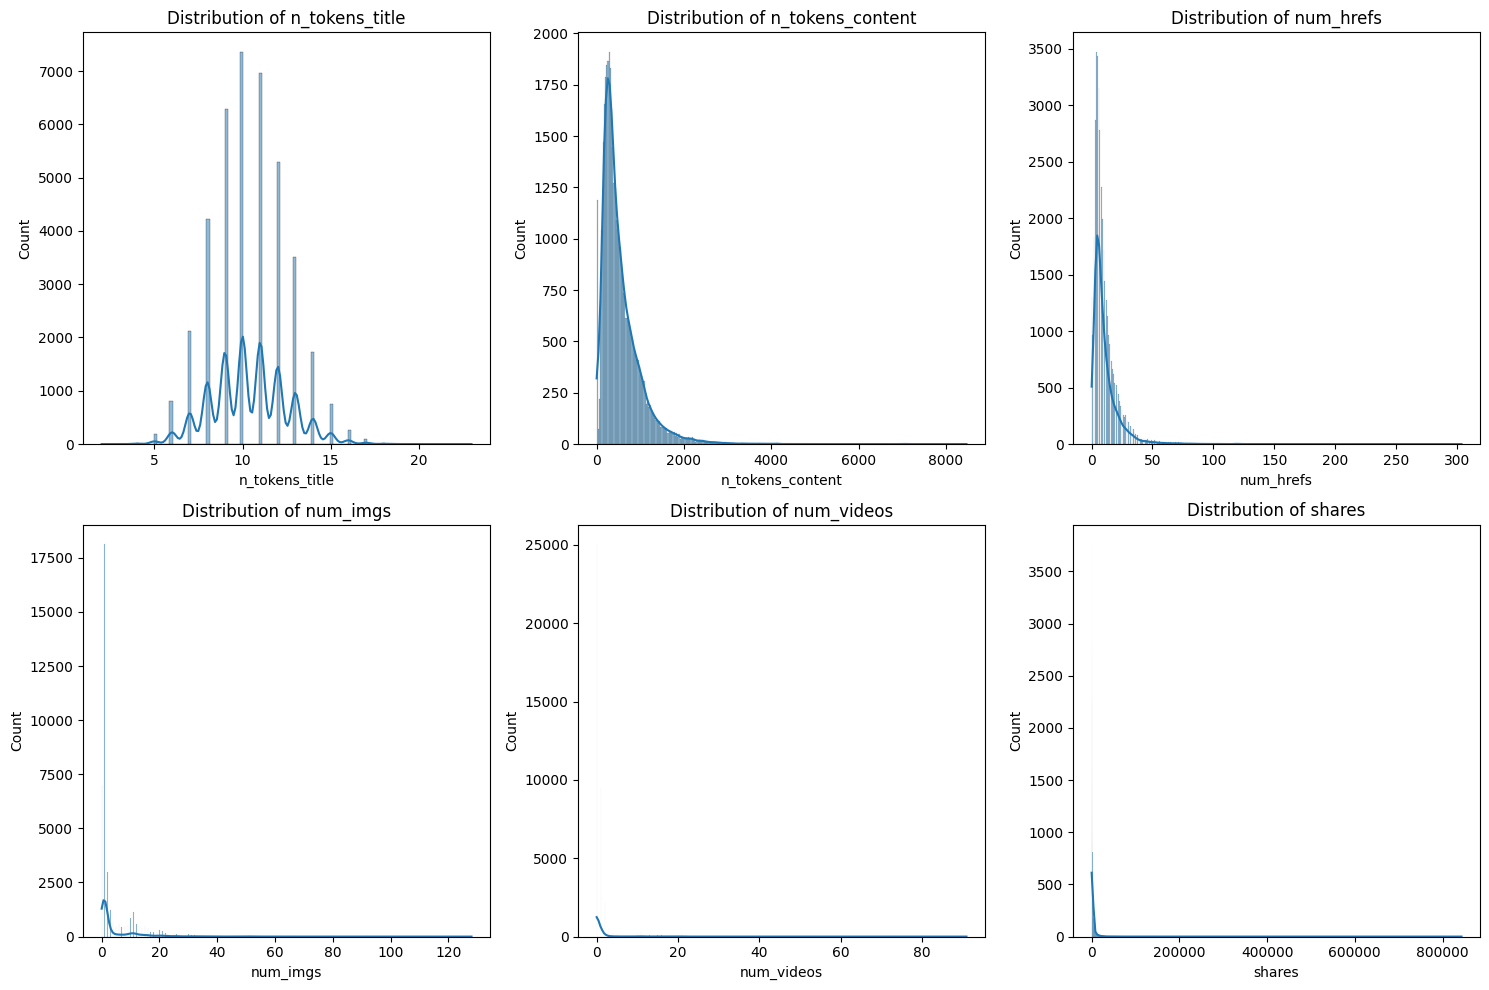

In [6]:
import matplotlib.pyplot as plt

df1.columns = df1.columns.str.strip()

numerical_cols = ['n_tokens_title', 'n_tokens_content', 'num_hrefs', 'num_imgs', 'num_videos', 'shares']

plt.figure(figsize=(15, 10))
for i, col in enumerate(numerical_cols):
    plt.subplot(2, 3, i + 1)
    sns.histplot(df1[col], kde=True)
    plt.title(f'Distribution of {col}')
plt.tight_layout()
plt.show()

**Reasoning**:
Identify potential outliers in the selected numerical features using box plots.



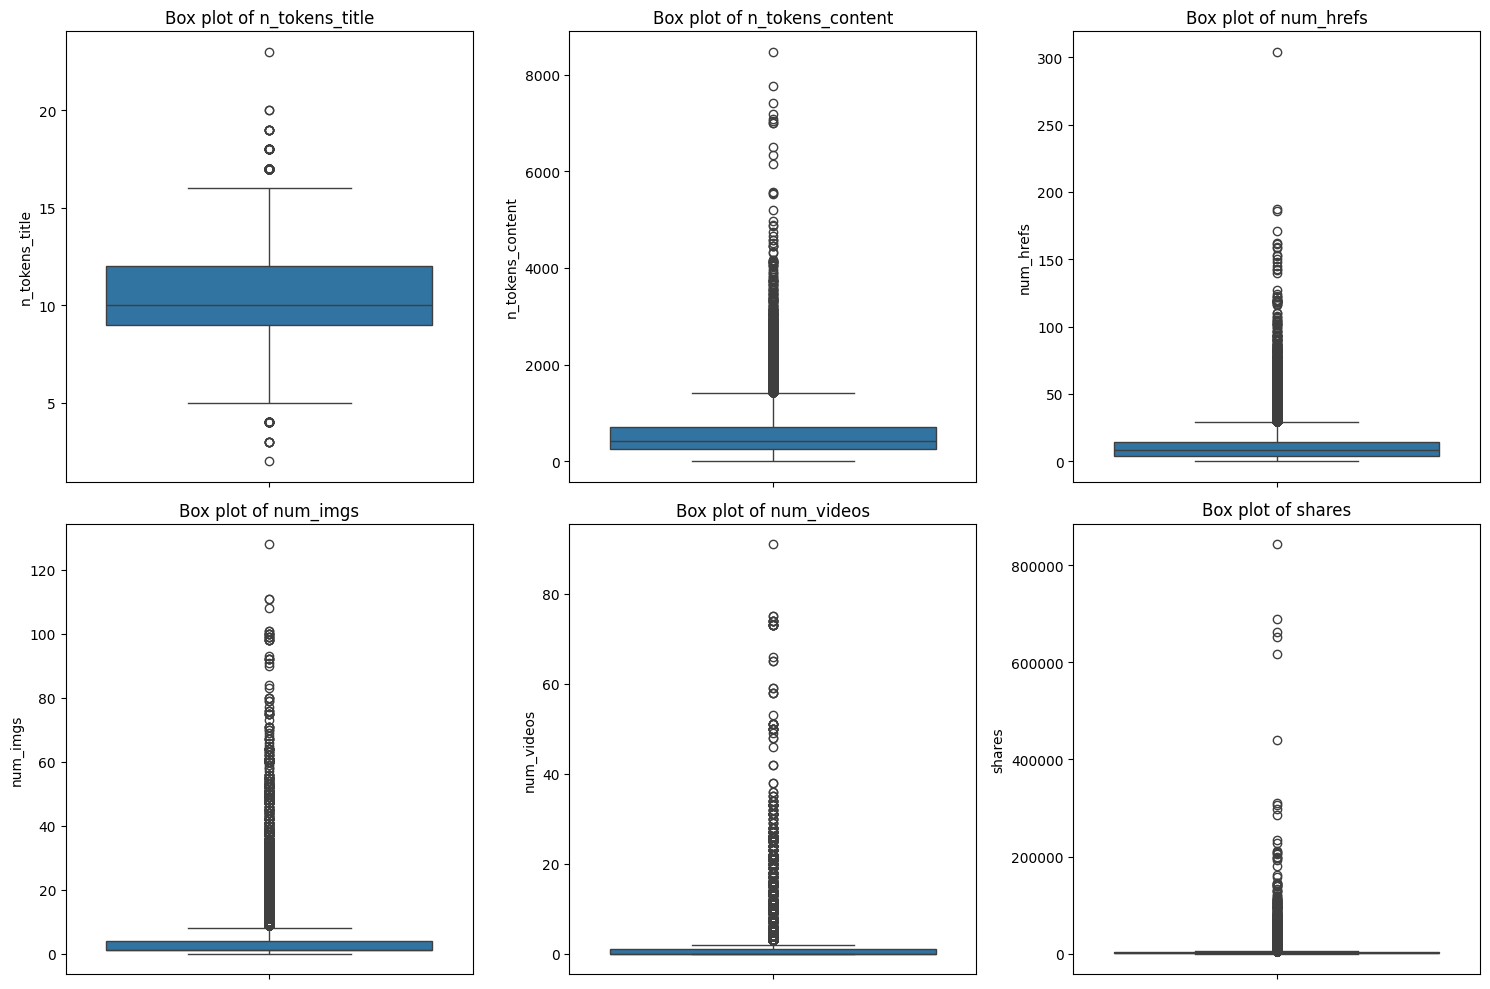

In [7]:
plt.figure(figsize=(15, 10))
for i, col in enumerate(numerical_cols):
    plt.subplot(2, 3, i + 1)
    sns.boxplot(y=df1[col])
    plt.title(f'Box plot of {col}')
plt.tight_layout()
plt.show()

**Reasoning**:
Identify potential categorical features and create count plots or bar plots to visualize their distributions. Based on the column names, the 'data_channel_is_*', 'weekday_is_*', and 'is_weekend' columns appear to be categorical.



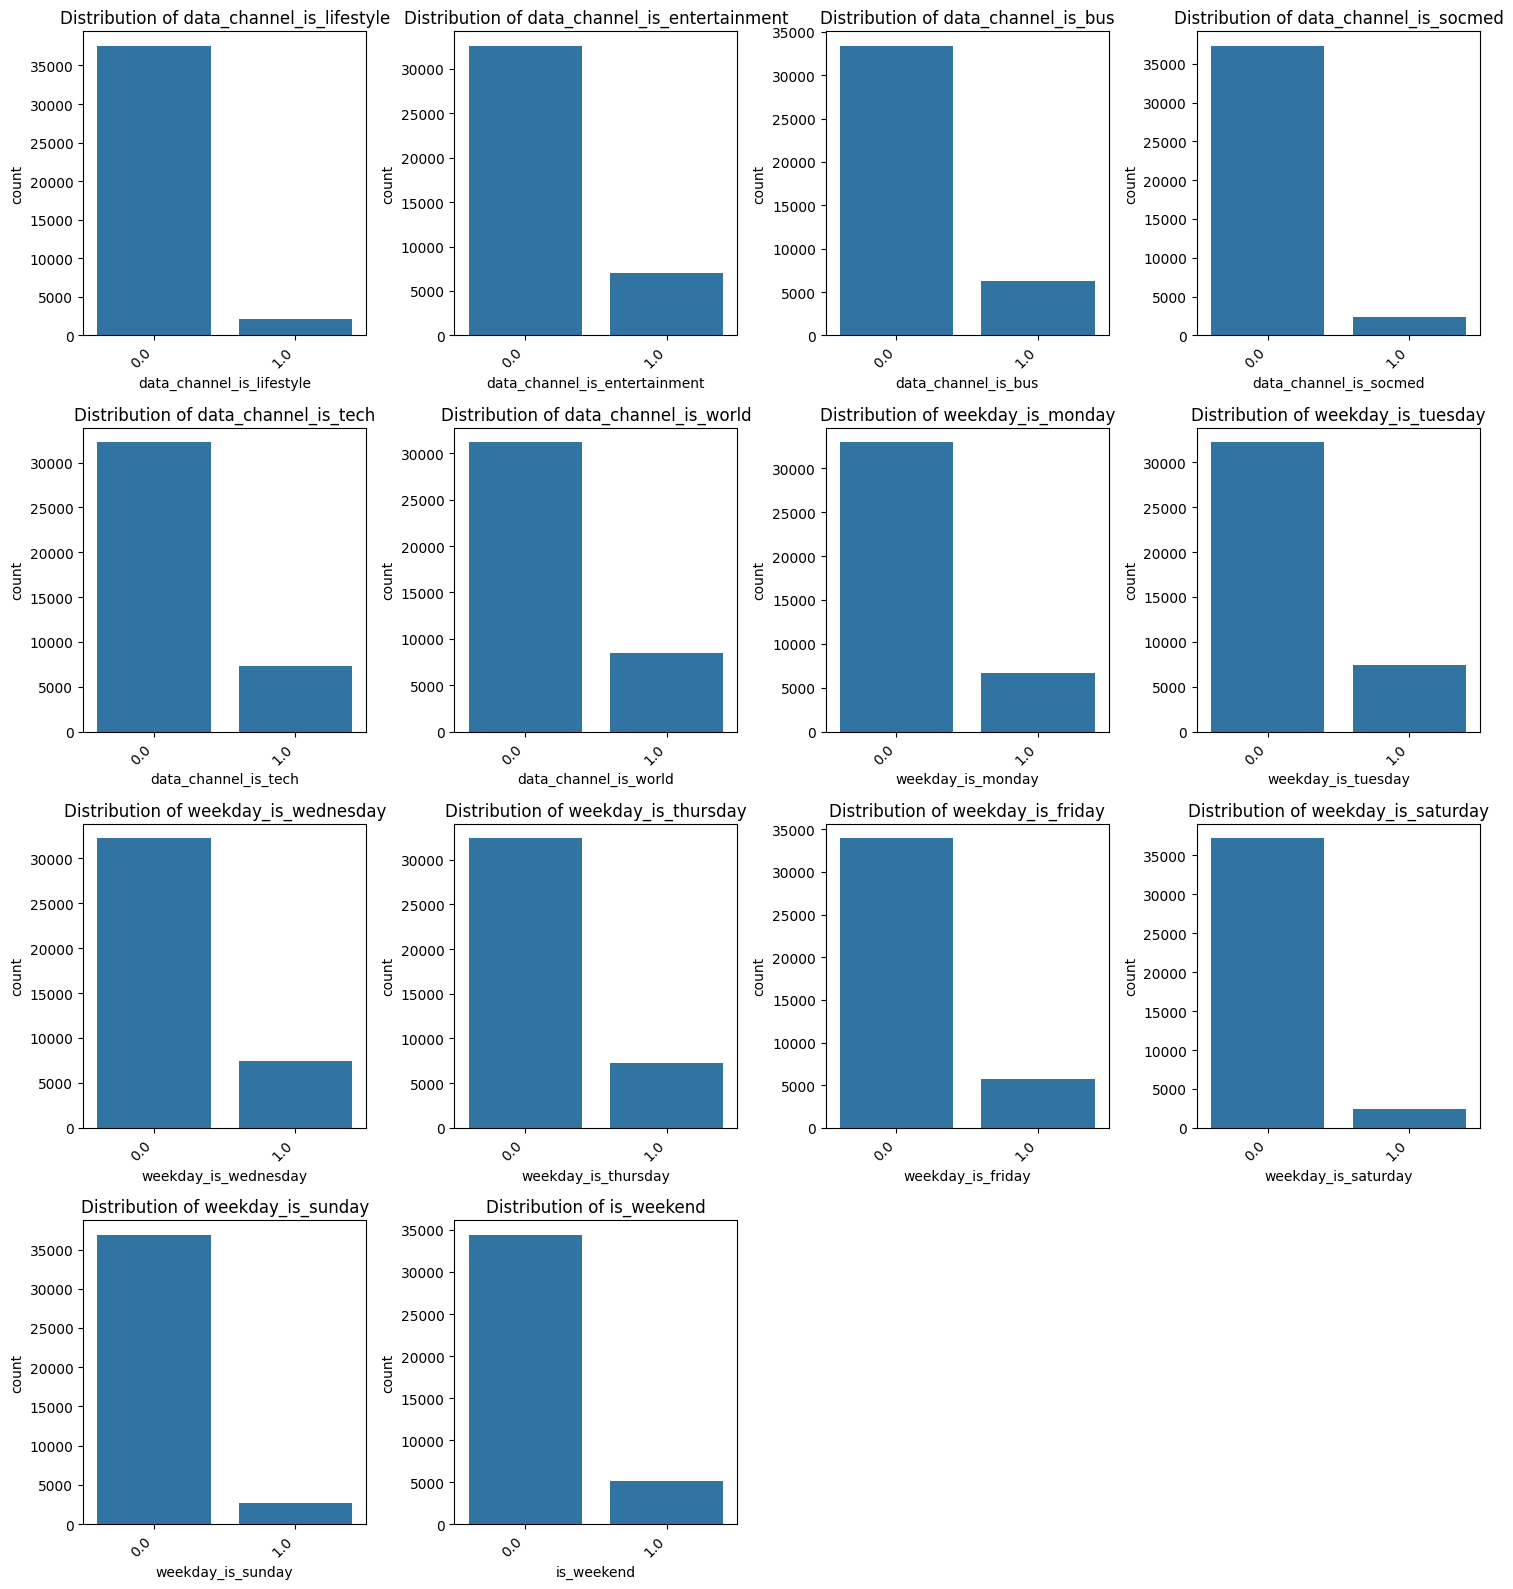

In [8]:
categorical_cols = [col for col in df1.columns if 'data_channel_is_' in col or 'weekday_is_' in col or 'is_weekend' in col]

n_cols = 4
n_rows = (len(categorical_cols) + n_cols - 1) // n_cols

plt.figure(figsize=(15, n_rows * 4))
for i, col in enumerate(categorical_cols):
    plt.subplot(n_rows, n_cols, i + 1)
    sns.countplot(x=df1[col])
    plt.title(f'Distribution of {col}')
    plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

## Bivariate analysis

### Subtask:
Explore the relationships between 'shares' and other relevant features using scatter plots, box plots, or other appropriate visualizations.


**Reasoning**:
Create scatter plots to visualize the relationship between 'shares' and the numerical features, using a logarithmic scale for the 'shares' axis due to its skewed distribution.



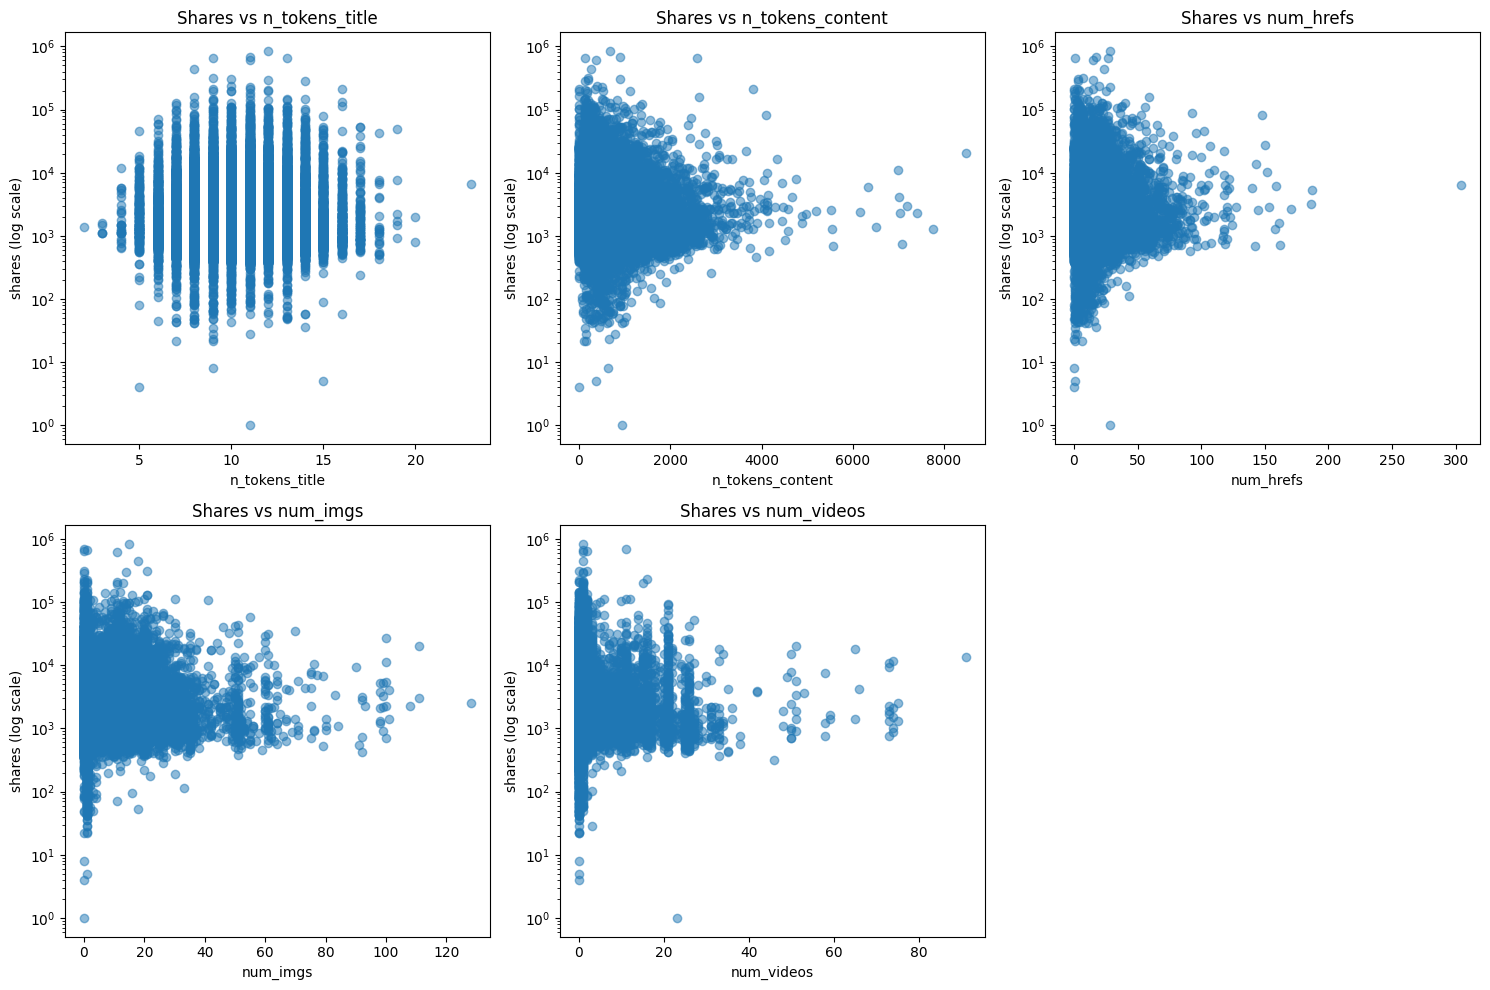

In [9]:
numerical_cols = ['n_tokens_title', 'n_tokens_content', 'num_hrefs', 'num_imgs', 'num_videos']

plt.figure(figsize=(15, 10))
for i, col in enumerate(numerical_cols):
    plt.subplot(2, 3, i + 1)
    plt.scatter(df1[col], df1['shares'], alpha=0.5)
    plt.yscale('log')
    plt.xlabel(col)
    plt.ylabel('shares (log scale)')
    plt.title(f'Shares vs {col}')
plt.tight_layout()
plt.show()

**Reasoning**:
Create box plots to visualize the relationship between 'shares' and the categorical features.



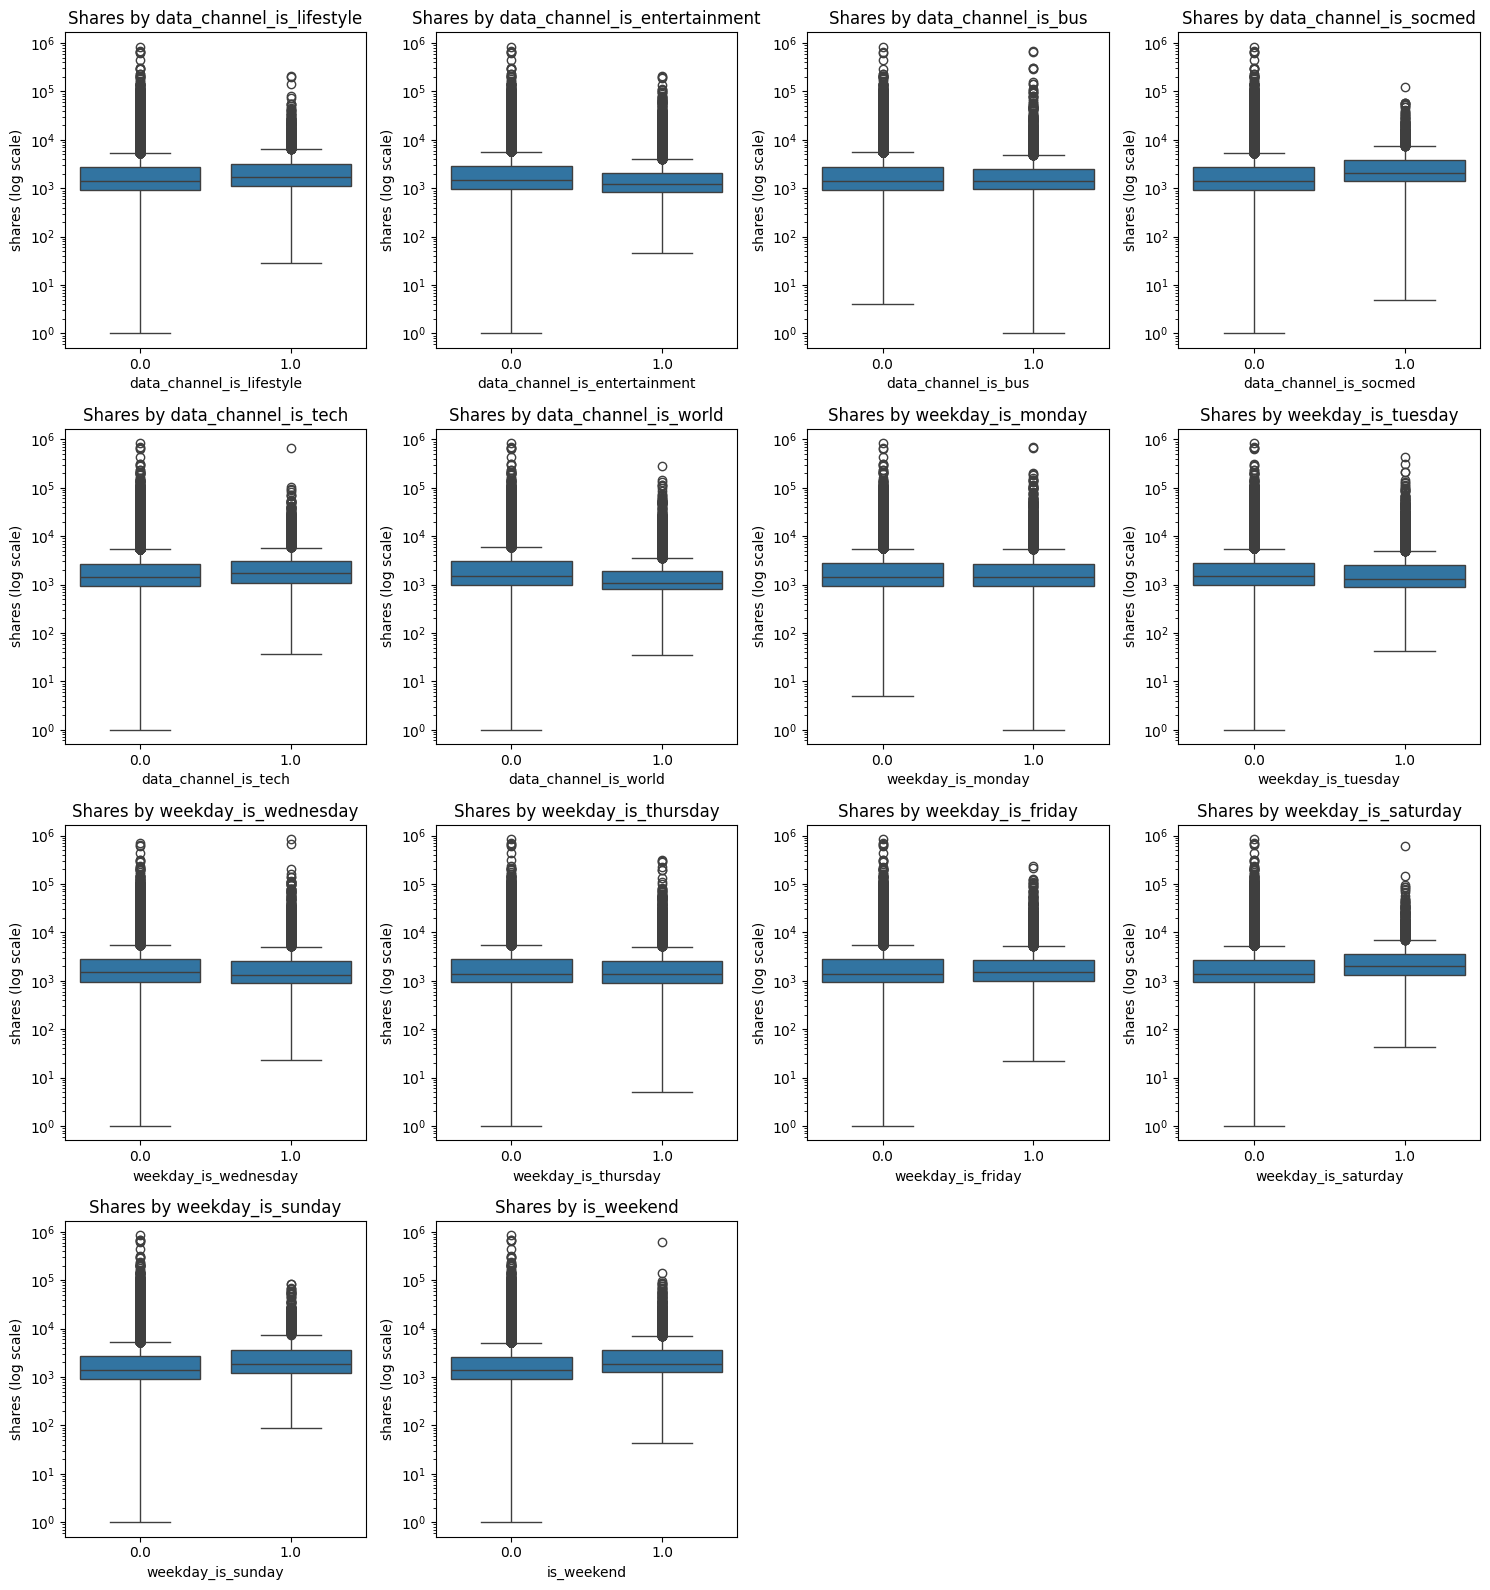

In [10]:
categorical_cols = [col for col in df1.columns if 'data_channel_is_' in col or 'weekday_is_' in col or 'is_weekend' in col]

n_cols = 4
n_rows = (len(categorical_cols) + n_cols - 1) // n_cols

plt.figure(figsize=(15, n_rows * 4))
for i, col in enumerate(categorical_cols):
    plt.subplot(n_rows, n_cols, i + 1)
    sns.boxplot(x=df1[col], y=df1['shares'])
    plt.yscale('log')
    plt.xlabel(col)
    plt.ylabel('shares (log scale)')
    plt.title(f'Shares by {col}')
plt.tight_layout()
plt.show()

## Multivariate analysis

### Subtask:
Examine the relationships between multiple features and 'shares' using techniques like correlation matrices, pair plots, or regression analysis.


**Reasoning**:
Calculate the correlation matrix for all numerical columns in the DataFrame df1 and visualize it using a heatmap.



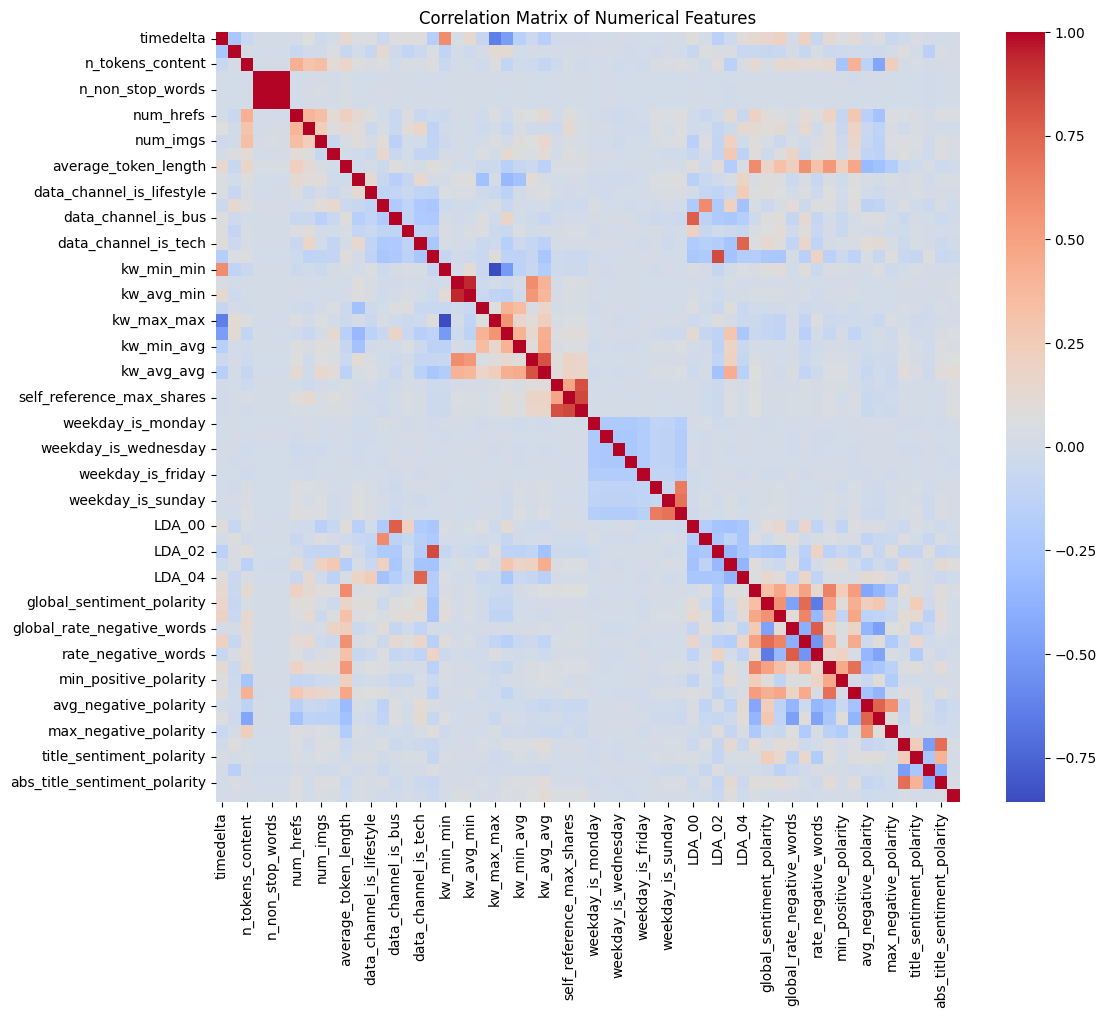

In [11]:
numerical_cols = df1.select_dtypes(include=np.number).columns
correlation_matrix = df1[numerical_cols].corr()

plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, cmap='coolwarm', annot=False)
plt.title('Correlation Matrix of Numerical Features')
plt.show()

**Reasoning**:
Create pair plots for a subset of features that showed some potential relationship with 'shares' in the bivariate analysis or have high correlations among themselves, along with 'shares', to explore their relationships in more detail. Based on the bivariate analysis, 'num_hrefs', 'num_imgs', and 'num_videos' showed slight variations with 'shares'. Also, 'kw_avg_avg', 'self_reference_min_shares', 'self_reference_max_shares', and 'self_reference_avg_sharess' showed some correlation with 'shares' in the correlation matrix.



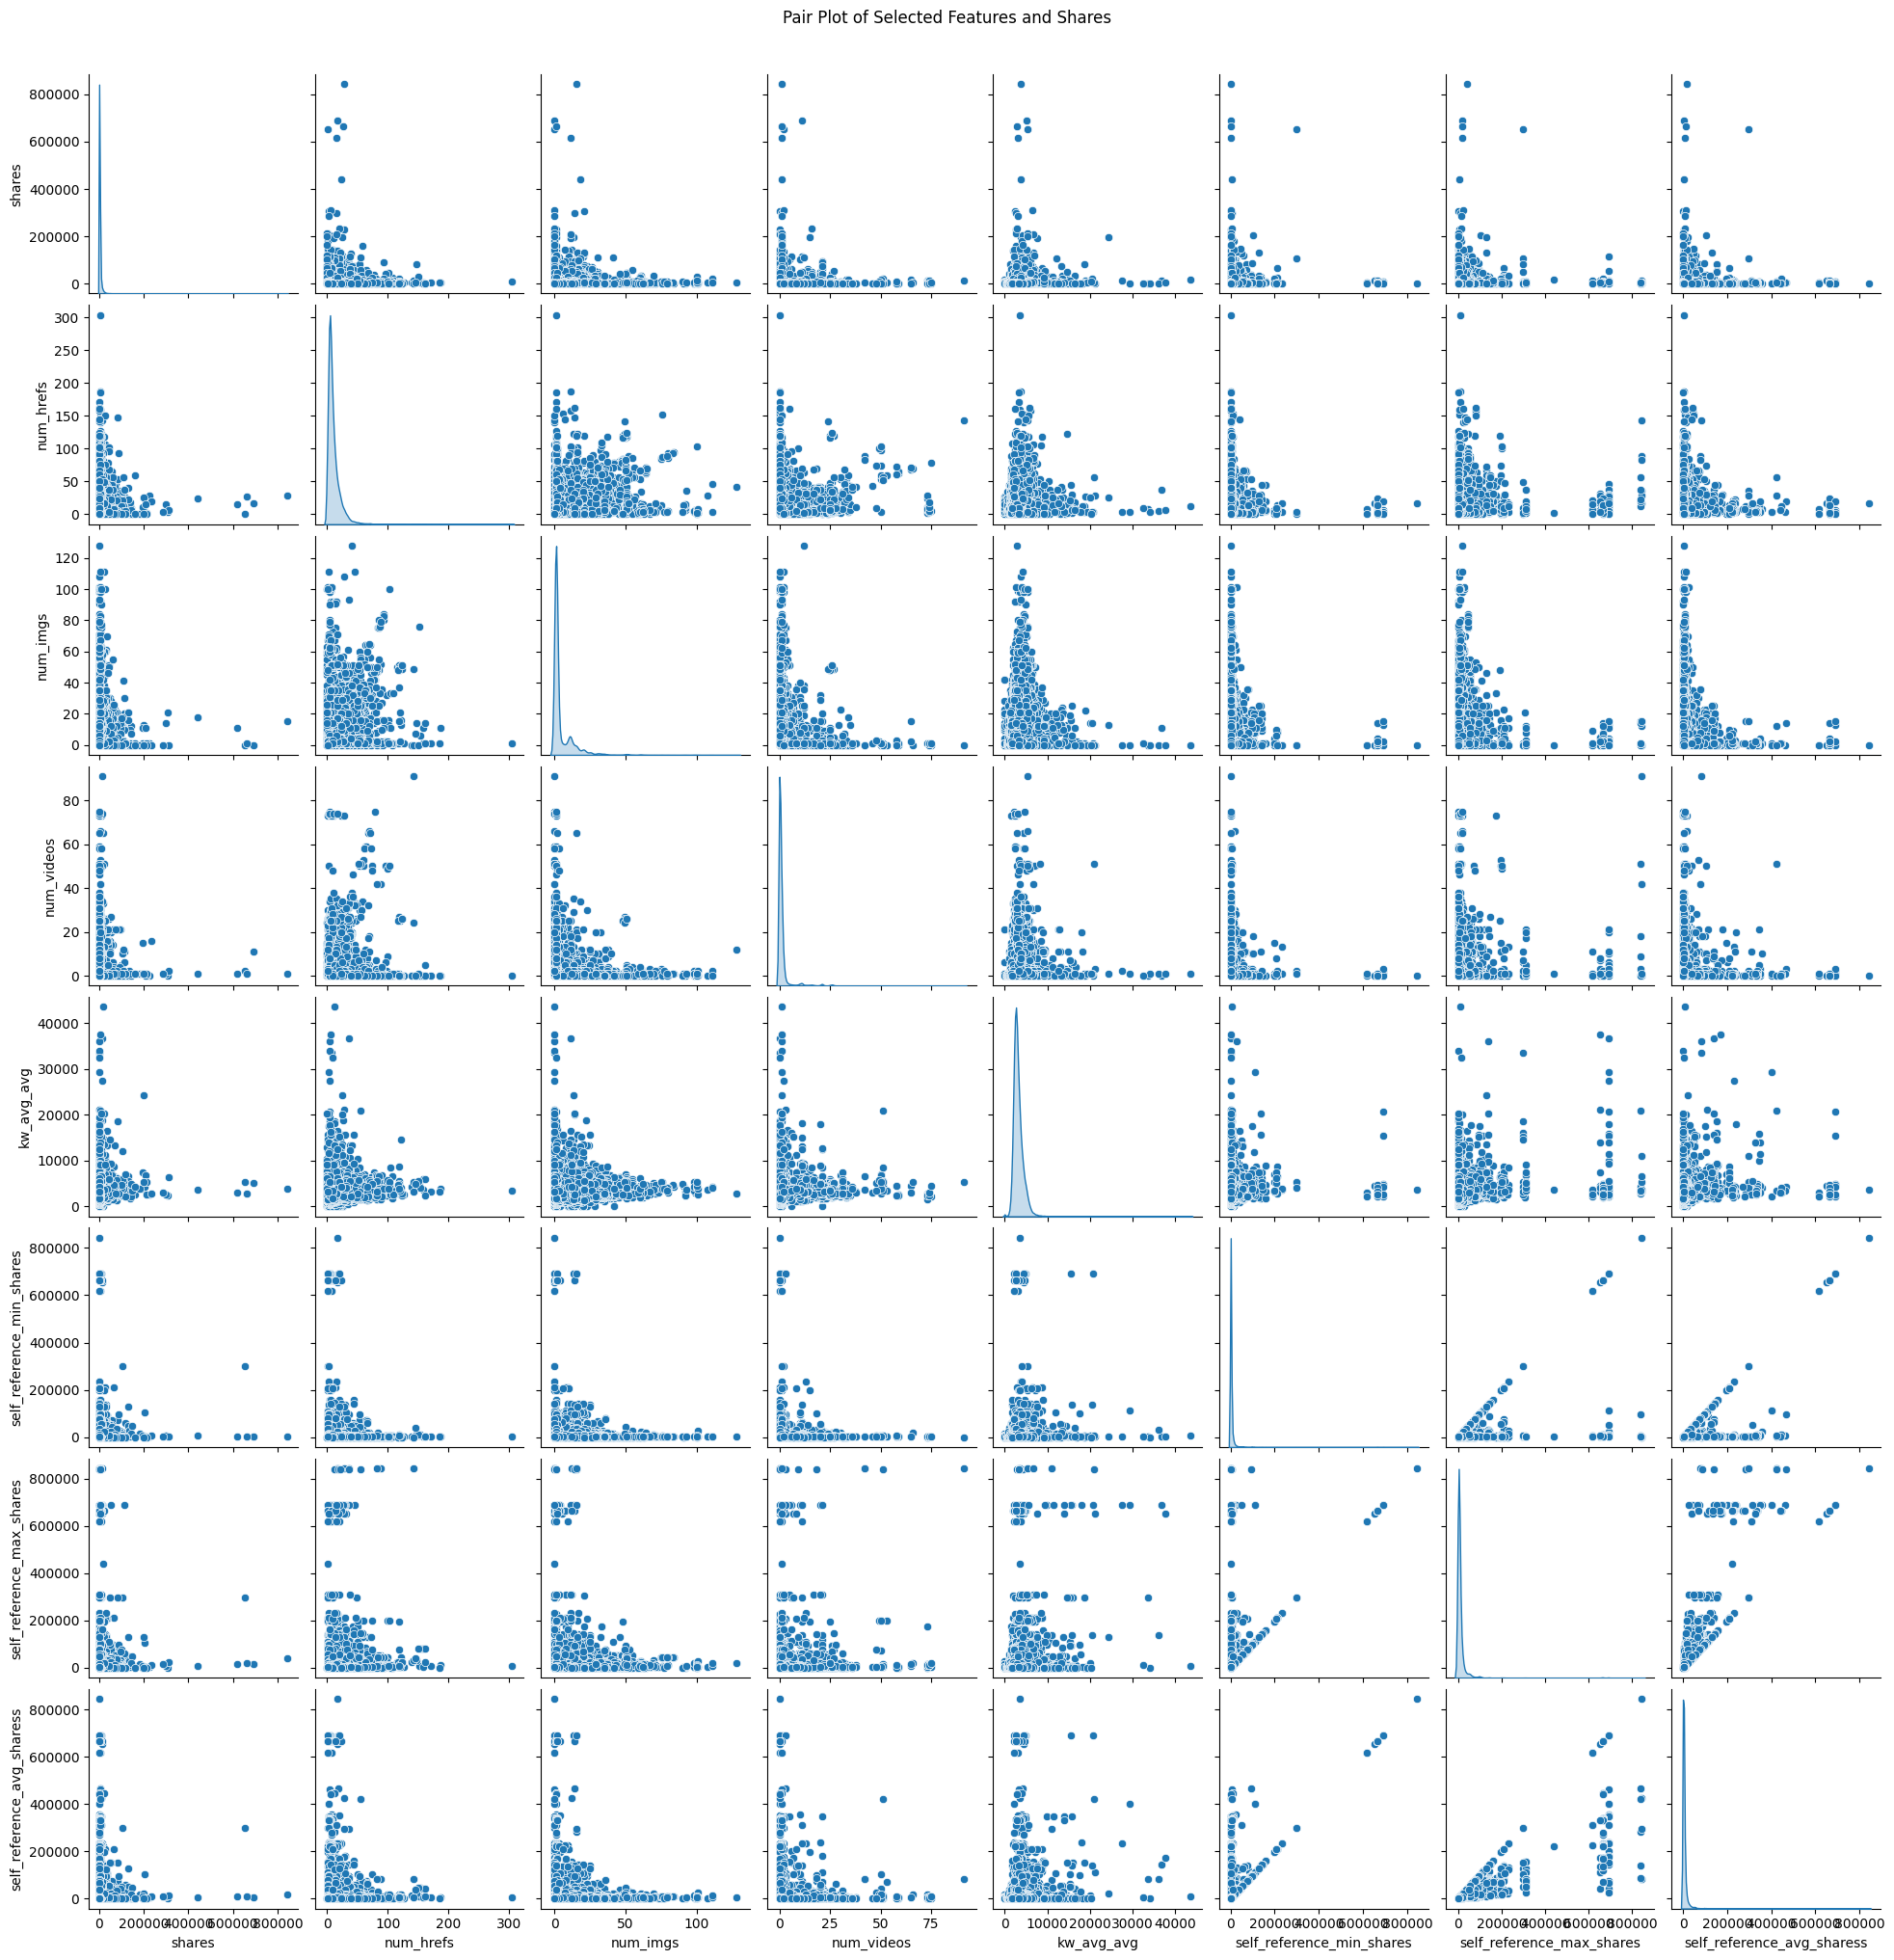

In [12]:
features_for_pairplot = ['shares', 'num_hrefs', 'num_imgs', 'num_videos', 'kw_avg_avg', 'self_reference_min_shares', 'self_reference_max_shares', 'self_reference_avg_sharess']

sns.pairplot(df1[features_for_pairplot], diag_kind='kde')
plt.suptitle('Pair Plot of Selected Features and Shares', y=1.02)
plt.show()

## Summarize findings

### Subtask:
Provide a summary of the key findings from the EDA, highlighting the features that are most likely to influence news popularity.


## Summary:

### Data Analysis Key Findings

*   The distribution of the target variable 'shares' is heavily skewed, with a long tail indicating a small number of articles receive a very high number of shares. A logarithmic scale was used for visualizations involving 'shares' to better handle this skewness.
*   Univariate analysis of numerical features like `n_tokens_title`, `n_tokens_content`, `num_hrefs`, `num_imgs`, and `num_videos` showed varying distributions, with some features like `num_hrefs`, `num_imgs`, and `num_videos` having a large number of articles with low counts.
*   Categorical features representing data channels (`data_channel_is_*`), weekdays (`weekday_is_*`), and weekend status (`is_weekend`) showed the distribution of articles across these categories.
*   Bivariate analysis using scatter plots of numerical features against 'shares' (log scale) did not reveal strong linear correlations.
*   Box plots of 'shares' (log scale) across different categories of categorical features showed variations in the median and spread of shares, suggesting some influence of data channel and weekend status on popularity.
*   Multivariate analysis using a correlation matrix showed generally weak linear correlations between numerical features and 'shares'. Features like `kw_avg_avg`, `self_reference_min_shares`, `self_reference_max_shares`, and `self_reference_avg_sharess` had slightly higher, though still relatively low, correlations with 'shares'.
*   Pair plots confirmed the weak linear relationships observed in the correlation matrix for selected features and 'shares'.

### Insights or Next Steps

*   News popularity ('shares') is likely influenced by a complex interplay of multiple features rather than being strongly predictable by individual features in a simple linear manner.
*   Further analysis should explore non-linear relationships, feature interactions, and potentially use machine learning models to better understand and predict news popularity. Features identified with some association, such as data channel, weekend status, and self-reference share metrics, could be important inputs for these models.


## Data preprocessing

### Subtask:
Prepare the data for modeling, which may include handling outliers, feature scaling, and encoding categorical variables.


**Reasoning**:
Apply logarithmic transformation to the 'shares' column, identify numerical and categorical columns, apply standard scaling to numerical features, apply one-hot encoding to categorical features, and concatenate the processed features into a new DataFrame.



In [13]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
import numpy as np
import pandas as pd

# 1. Handle outliers in the 'shares' column by applying a logarithmic transformation.
df1['shares_log'] = np.log1p(df1['shares'])

# 2. Identify the numerical and categorical columns (excluding 'url' and the original 'shares' column).
# Make a copy to avoid modifying the list during iteration if it were iterated on later
numerical_cols = df1.select_dtypes(include=np.number).columns.tolist()
if 'shares' in numerical_cols:
    numerical_cols.remove('shares')
if 'shares_log' in numerical_cols:
    numerical_cols.remove('shares_log')

categorical_cols = df1.select_dtypes(include='object').columns.tolist()
# Remove 'url' from the list of categorical columns to be one-hot encoded,
# as it's typically an identifier and not a feature for OHE.
# It will be handled by remainder='passthrough' and then explicitly dropped.
if 'url' in categorical_cols:
    categorical_cols.remove('url')


# Manually fit the OneHotEncoder to get feature names (even if categorical_cols is empty, this pattern is fine)
ohe = OneHotEncoder(handle_unknown='ignore')
if categorical_cols: # Only fit if there are actual categorical columns
    ohe.fit(df1[categorical_cols])
    categorical_feature_names = ohe.get_feature_names_out(categorical_cols)
else:
    categorical_feature_names = np.array([])


# Create preprocessor to scale numerical features and one-hot encode categorical features
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_cols),
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_cols)
    ],
    remainder='passthrough' # Keep other columns (like 'url', original 'shares', 'shares_log')
)

# Apply preprocessing: fit and transform the data
processed_data = preprocessor.fit_transform(df1)

# 6. Construct the list of all feature names after preprocessing.
transformed_feature_names = preprocessor.get_feature_names_out()
all_column_names = list(transformed_feature_names)

# 7. Create a new DataFrame from the transformed data and the combined feature names.
processed_df = pd.DataFrame(processed_data, columns=all_column_names)

# --- FIX FOR DTYPE ISSUE AND UNWANTED PASSTHROUGH COLUMNS ---
# The 'remainder__shares_log' column might have been cast to 'object' dtype due to 'remainder__url' being a string.
# We need to ensure 'remainder__shares_log' is numeric and drop the 'url' and original 'shares' columns.

# Convert 'remainder__shares_log' to numeric type
if 'remainder__shares_log' in processed_df.columns:
    processed_df['remainder__shares_log'] = pd.to_numeric(processed_df['remainder__shares_log'])

# Drop other 'remainder__' columns that are not 'remainder__shares_log' (e.g., 'remainder__url', 'remainder__shares').
passthrough_cols_to_drop_final = [col for col in processed_df.columns if col.startswith('remainder__') and col != 'remainder__shares_log']
processed_df = processed_df.drop(columns=passthrough_cols_to_drop_final, errors='ignore')

# 8. Display the head of the resulting processed DataFrame.
display(processed_df.head())

,num__timedelta,num__n_tokens_title,num__n_tokens_content,num__n_unique_tokens,num__n_non_stop_words,num__n_non_stop_unique_tokens,num__num_hrefs,num__num_self_hrefs,num__num_imgs,num__num_videos,...,num__min_positive_polarity,num__max_positive_polarity,num__avg_negative_polarity,num__min_negative_polarity,num__max_negative_polarity,num__title_subjectivity,num__title_sentiment_polarity,num__abs_title_subjectivity,num__abs_title_sentiment_polarity,remainder__shares_log
0,1.75788,0.757447,-0.69521,0.032772,0.000675,0.038658,-0.607463,-0.335566,-0.426526,-0.304268,...,0.063865,-0.228941,-0.708369,-0.268895,-0.969886,0.671245,-0.975432,-1.810719,0.13892,6.386879
1,1.75788,-0.661657,-0.618794,0.016056,0.000675,0.031479,-0.695709,-0.594963,-0.426526,-0.304268,...,-0.870968,-0.228941,1.102174,1.367424,0.078642,-0.870807,-0.269076,0.837749,-0.689658,6.568078
2,1.75788,-0.661657,-0.712192,0.007645,0.000675,-0.007752,-0.695709,-0.594963,-0.426526,-0.304268,...,0.063865,0.981798,-1.621797,-0.957871,-0.270867,-0.870807,-0.269076,0.837749,-0.689658,7.313887
3,1.75788,-0.661657,-0.032933,-0.012619,0.000675,-0.007211,-0.166229,-0.85436,-0.426526,-0.304268,...,0.573773,0.174639,-0.862584,-0.268895,-0.620377,-0.870807,-0.269076,0.837749,-0.689658,7.090910
4,1.75788,1.230482,1.115439,-0.037655,0.000675,-0.04542,0.716237,4.074185,1.860061,-0.304268,...,-0.870968,0.981798,0.307944,0.075594,0.602906,0.531059,0.244637,-1.569949,-0.087056,6.226537


## Feature selection/engineering

### Subtask:
Based on the EDA and domain knowledge, select the most relevant features or create new ones to improve model performance.


**Reasoning**:
Select the features from `processed_df` that are most relevant for predicting 'shares_log' based on the EDA findings and create a new DataFrame with these selected features and the target variable.



In [14]:
# Based on EDA, features with some correlation or noticeable differences in box plots include:
# Numerical: 'num_hrefs', 'num_imgs', 'num_videos', 'kw_avg_avg', 'self_reference_min_shares', 'self_reference_max_shares', 'self_reference_avg_sharess'
# Categorical: 'data_channel_is_*', 'weekday_is_*', 'is_weekend'

# We need to find the corresponding column names in the processed_df
selected_features = ['remainder__shares_log',
                     'num__num_hrefs', 'num__num_imgs', 'num__num_videos',
                     'num__kw_avg_avg', 'num__self_reference_min_shares',
                     'num__self_reference_max_shares', 'num__self_reference_avg_sharess']

# Add processed categorical features. We can include all of them since there are not too many.
categorical_processed_cols = [col for col in processed_df.columns if 'cat__' in col]
selected_features.extend(categorical_processed_cols)

# Create a new DataFrame with the selected features and the target variable
df_selected = processed_df[selected_features]

# Display the first few rows of the selected DataFrame
display(df_selected.head())

,remainder__shares_log,num__num_hrefs,num__num_imgs,num__num_videos,num__kw_avg_avg,num__self_reference_min_shares,num__self_reference_max_shares,num__self_reference_avg_sharess
0,6.386879,-0.607463,-0.426526,-0.304268,-2.379014,-0.177459,-0.239676,-0.243926
1,6.568078,-0.695709,-0.426526,-0.304268,-2.379014,-0.202587,-0.251766,-0.264412
2,7.313887,-0.695709,-0.426526,-0.304268,-2.379014,-0.156079,-0.22939,-0.226496
3,7.090910,-0.166229,-0.426526,-0.304268,-2.379014,-0.202587,-0.251766,-0.264412
4,6.226537,0.716237,1.860061,-0.304268,-2.379014,-0.174976,0.138221,-0.134259


## Model selection

### Subtask:
Choose appropriate regression models for predicting news shares. Consider models like Linear Regression, Ridge, Lasso, Decision Trees, Random Forests, or Gradient Boosting.


**Reasoning**:
Import the necessary regression models from sklearn and describe each model with its potential advantages and disadvantages for this task.



In [15]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor

# 1. Linear Regression
print("Linear Regression:")
print("  - Description: A simple model that assumes a linear relationship between features and the target variable.")
print("  - Advantages: Easy to interpret, computationally efficient.")
print("  - Disadvantages: Assumes linearity, sensitive to outliers.")
print("  - Suitability for this task: May not capture complex relationships, but a good baseline model. Outliers in shares could be an issue.")

# 2. Ridge Regression
print("\nRidge Regression:")
print("  - Description: A linear model with L2 regularization, which shrinks coefficients towards zero.")
print("  - Advantages: Helps prevent overfitting, less sensitive to multicollinearity than OLS.")
print("  - Disadvantages: Can't perform feature selection (coefficients are reduced but not zeroed).")
print("  - Suitability for this task: Useful if there are many features and potential multicollinearity.")

# 3. Lasso Regression
print("\nLasso Regression:")
print("  - Description: A linear model with L1 regularization, which can shrink coefficients to zero, performing feature selection.")
print("  - Advantages: Can perform feature selection, helps prevent overfitting.")
print("  - Disadvantages: Can be unstable if features are highly correlated.")
print("  - Suitability for this task: Useful for identifying potentially important features and reducing model complexity.")

# 4. Decision Tree Regressor
print("\nDecision Tree Regressor:")
print("  - Description: A non-linear model that splits the data based on feature values to make predictions.")
print("  - Advantages: Can capture non-linear relationships, easy to understand (for small trees).")
print("  - Disadvantages: Prone to overfitting, can be unstable (sensitive to small data changes).")
print("  - Suitability for this task: Can model complex interactions, but needs careful tuning to avoid overfitting.")

# 5. Random Forest Regressor
print("\nRandom Forest Regressor:")
print("  - Description: An ensemble model that builds multiple decision trees and averages their predictions.")
print("  - Advantages: Reduces overfitting compared to single decision trees, generally more robust.")
print("  - Disadvantages: Less interpretable than single trees, computationally more expensive.")
print("  - Suitability for this task: A strong candidate for its ability to handle non-linearity and interactions, and its robustness.")

# 6. Gradient Boosting Regressor
print("\nGradient Boosting Regressor:")
print("  - Description: Another ensemble model that builds trees sequentially, with each tree trying to correct the errors of the previous ones.")
print("  - Advantages: Often achieves high accuracy, can capture complex relationships.")
print("  - Disadvantages: Can be prone to overfitting if not tuned properly, computationally intensive, less parallelizable.")
print("  - Suitability for this task: Often performs very well on complex datasets, a strong candidate for its predictive power.")

# Justification for selecting promising models for initial training:
print("\nPromising Models for Initial Training:")
print("Based on the characteristics of the data (potential non-linearity, interactions, and the goal of predictive accuracy), the following models appear most promising for initial training and evaluation:")
print("- Random Forest Regressor: Good at handling non-linearity and interactions, less prone to overfitting than single trees.")
print("- Gradient Boosting Regressor: Often provides high accuracy and can capture complex patterns.")
print("- Lasso Regression: Useful for feature selection and understanding which features might be most impactful in a linear context, and can serve as a simpler benchmark.")
print("Linear Regression and Ridge can also be included as baselines, but are less likely to capture the nuances of the data as effectively as the tree-based models.")

Linear Regression:
  - Description: A simple model that assumes a linear relationship between features and the target variable.
  - Advantages: Easy to interpret, computationally efficient.
  - Disadvantages: Assumes linearity, sensitive to outliers.
  - Suitability for this task: May not capture complex relationships, but a good baseline model. Outliers in shares could be an issue.

Ridge Regression:
  - Description: A linear model with L2 regularization, which shrinks coefficients towards zero.
  - Advantages: Helps prevent overfitting, less sensitive to multicollinearity than OLS.
  - Disadvantages: Can't perform feature selection (coefficients are reduced but not zeroed).
  - Suitability for this task: Useful if there are many features and potential multicollinearity.

Lasso Regression:
  - Description: A linear model with L1 regularization, which can shrink coefficients to zero, performing feature selection.
  - Advantages: Can perform feature selection, helps prevent overfitting.

## Model training

### Subtask:
Split the data into training and testing sets and train the selected models on the training data.


**Reasoning**:
Split the data into training and testing sets and train the selected models on the training data.



In [16]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.linear_model import Lasso

# Define features (X) and target variable (y)
X = df_selected.drop('remainder__shares_log', axis=1)
y = df_selected['remainder__shares_log']

# Ensure y is numeric before splitting
y = pd.to_numeric(y)

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Instantiate models
# rf_model = RandomForestRegressor(random_state=42)
gb_model = GradientBoostingRegressor(random_state=42)
# lasso_model = Lasso(random_state=42)

# Train models on the training data
# rf_model.fit(X_train, y_train)
gb_model.fit(X_train, y_train)
# lasso_model.fit(X_train, y_train)

print("Models trained successfully.")

Models trained successfully.


## Model evaluation

### Subtask:
Evaluate the performance of the trained models using appropriate metrics such as Mean Absolute Error (MAE), Mean Squared Error (MSE), or Root Mean Squared Error (RMSE).


**Reasoning**:
Evaluate the performance of the trained models using appropriate metrics such as Mean Absolute Error (MAE), Mean Squared Error (MSE), and Root Mean Squared Error (RMSE).



In [17]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

# Make predictions on the test set
# rf_predictions = rf_model.predict(X_test)
gb_predictions = gb_model.predict(X_test)
# lasso_predictions = lasso_model.predict(X_test)

# Calculate evaluation metrics for each model
# rf_mae = mean_absolute_error(y_test, rf_predictions)
# rf_mse = mean_squared_error(y_test, rf_predictions)
# rf_rmse = np.sqrt(rf_mse)

gb_mae = mean_absolute_error(y_test, gb_predictions)
gb_mse = mean_squared_error(y_test, gb_predictions)
gb_rmse = np.sqrt(gb_mse)

# lasso_mae = mean_absolute_error(y_test, lasso_predictions)
# lasso_mse = mean_squared_error(y_test, lasso_predictions)
# lasso_rmse = np.sqrt(lasso_mse)

# Print the evaluation metrics
# print("Random Forest Regressor Performance:")
# print(f"  MAE: {rf_mae:.4f}")
# print(f"  MSE: {rf_mse:.4f}")
# print(f"  RMSE: {rf_rmse:.4f}")

print("\nGradient Boosting Regressor Performance:")
print(f"  MAE: {gb_mae:.4f}")
print(f"  MSE: {gb_mse:.4f}")
print(f"  RMSE: {gb_rmse:.4f}")

# print("\nLasso Regressor Performance:")
# print(f"  MAE: {lasso_mae:.4f}")
# print(f"  MSE: {lasso_mse:.4f}")
# print(f"  RMSE: {lasso_rmse:.4f}")


Gradient Boosting Regressor Performance:
  MAE: 0.6529
  MSE: 0.7474
  RMSE: 0.8645


Random Forest Regressor Performance:
  MAE: 0.6839
  MSE: 0.8190
  RMSE: 0.9050

Gradient Boosting Regressor Performance:
  MAE: 0.6529
  MSE: 0.7474
  RMSE: 0.8645

Lasso Regressor Performance:
  MAE: 0.7077
  MSE: 0.8573
  RMSE: 0.9259

## Model tuning

### Subtask:
Fine-tune the hyperparameters of the best-performing models to optimize their performance.


**Reasoning**:
Identify the best performing model (Gradient Boosting Regressor), define a hyperparameter grid for it, and use GridSearchCV to find the best hyperparameters and evaluate the best score.



In [19]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import GradientBoostingRegressor

# The best performing model is Gradient Boosting Regressor (gb_model)

# Define hyperparameter grid for Gradient Boosting Regressor

# param_grid = {
#    'n_estimators': [100, 200, 300],
#    'learning_rate': [0.01, 0.05, 0.1],
#    'max_depth': [3, 4, 5],
#    'min_samples_split': [2, 5, 10],
#    'min_samples_leaf': [1, 2, 4]
# }

param_grid = {
   'n_estimators': [300],
   'learning_rate': [0.05],
   'max_depth': [4],
   'min_samples_split': [10],
   'min_samples_leaf': [2]
}

# Instantiate GridSearchCV
grid_search = GridSearchCV(estimator=gb_model, param_grid=param_grid, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)

# Fit GridSearchCV to the training data
grid_search.fit(X_train, y_train)

# Print the best hyperparameters and the best cross-validation score
print("Best hyperparameters found:")
print(grid_search.best_params_)

print("\nBest cross-validation score (negative MSE):")
print(grid_search.best_score_)

Best hyperparameters found:
{'learning_rate': 0.05, 'max_depth': 4, 'min_samples_leaf': 2, 'min_samples_split': 10, 'n_estimators': 300}

Best cross-validation score (negative MSE):
-0.7723037773259718


Best hyperparameters found:
{'learning_rate': 0.05, 'max_depth': 4, 'min_samples_leaf': 2, 'min_samples_split': 10, 'n_estimators': 300}

Best cross-validation score (negative MSE):
-0.7723037773259718

## Prediction and interpretation

### Subtask:
Use the final model to make predictions on new data and interpret the results to understand which features are most influential in predicting news shares.


**Reasoning**:
Get the best model from the grid search, make predictions on the test set, inverse transform the predictions and actual values, calculate and print evaluation metrics on the original scale, and if possible, print feature importances of the best model.



In [20]:
# 1. Get the best performing model from the grid_search object.
best_model = grid_search.best_estimator_

# 2. Make predictions on the test data (X_test) using the best model.
predictions_log = best_model.predict(X_test)

# 3. Inverse transform the predicted log shares and the actual log shares (y_test) back to the original shares scale.
predictions_original = np.expm1(predictions_log)
actual_original = np.expm1(y_test)

# 4. Calculate and print the evaluation metrics (MAE, MSE, RMSE) on the inverse-transformed shares.
mae_original = mean_absolute_error(actual_original, predictions_original)
mse_original = mean_squared_error(actual_original, predictions_original)
rmse_original = np.sqrt(mse_original)

print("Evaluation Metrics on Original Shares Scale (Best Gradient Boosting Model):")
print(f"  MAE: {mae_original:.4f}")
print(f"  MSE: {mse_original:.4f}")
print(f"  RMSE: {rmse_original:.4f}")

# 5. If the best model has a feature_importances_ attribute, access and print them.
if hasattr(best_model, 'feature_importances_'):
    feature_importances = best_model.feature_importances_
    # Match the feature importances to the correct feature names from X_train.
    feature_names = X_train.columns
    importance_dict = dict(zip(feature_names, feature_importances))

    # Sort features by importance
    sorted_importance = sorted(importance_dict.items(), key=lambda item: item[1], reverse=True)

    print("\nFeature Importances (Best Gradient Boosting Model):")
    for feature, importance in sorted_importance:
        print(f"  {feature}: {importance:.4f}")
else:
    print("\nBest model does not have feature_importances_ attribute.")

# 6. Discuss the implications of the evaluation metrics on the original scale and the insights gained from feature importances regarding which factors influence news popularity.
print("\nDiscussion:")
print("The evaluation metrics (MAE, MSE, RMSE) on the original shares scale indicate the typical error in predicting the actual number of shares. A lower value indicates better performance. Comparing these values to the range of 'shares' provides context on the model's accuracy.")
print("Feature importances reveal which features the model found most useful in making predictions. Features with higher importance scores are considered more influential in determining the number of news shares according to this model.")

Evaluation Metrics on Original Shares Scale (Best Gradient Boosting Model):
  MAE: 2353.6421
  MSE: 120314448.0848
  RMSE: 10968.7943

Feature Importances (Best Gradient Boosting Model):
  num__kw_avg_avg: 0.4580
  num__self_reference_min_shares: 0.1519
  num__self_reference_avg_sharess: 0.1481
  num__num_hrefs: 0.1090
  num__num_imgs: 0.0638
  num__self_reference_max_shares: 0.0369
  num__num_videos: 0.0323

Discussion:
The evaluation metrics (MAE, MSE, RMSE) on the original shares scale indicate the typical error in predicting the actual number of shares. A lower value indicates better performance. Comparing these values to the range of 'shares' provides context on the model's accuracy.
Feature importances reveal which features the model found most useful in making predictions. Features with higher importance scores are considered more influential in determining the number of news shares according to this model.


In [21]:
comparison_df = pd.DataFrame({'Actual Shares': actual_original, 'Predicted Shares': predictions_original})
display(comparison_df.head())

,Actual Shares,Predicted Shares
32340,2900.0,1633.183801
10480,1300.0,1322.125327
15370,17700.0,2582.435334
31592,1500.0,1718.545185
198,1400.0,1241.574630


# Task
Introducing new regression algorithms: Support Vector Regressor (SVR), K-Nearest Neighbors Regressor, and Multi-layer Perceptron Regressor (Neural Network). Explain their potential advantages and disadvantages for this task, focusing on their distinct approaches compared to previously explored models. Then, tune the Support Vector Regressor (SVR) by defining a suitable hyperparameter grid and performing `GridSearchCV` to find the optimal hyperparameters using `X_train` and `y_train`. This model can capture complex non-linear relationships.

## Model Selection - New Algorithms

### Subtask:
Introduce and describe new regression algorithms such as Support Vector Regressor (SVR), K-Nearest Neighbors Regressor, and Multi-layer Perceptron Regressor (Neural Network). Explain their potential advantages and disadvantages for this task, focusing on their distinct approaches compared to previously explored models.


**Reasoning**:
Import the necessary regression models (SVR, KNeighborsRegressor, MLPRegressor) from sklearn and provide a description for each, detailing their approach, advantages, disadvantages, and suitability for the task, while comparing them to previously discussed models.



In [22]:
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.neural_network import MLPRegressor

# 1. Support Vector Regressor (SVR)
print("Support Vector Regressor (SVR):")
print("  - Description: A non-linear model that finds a function which approximates the relationship between input features and the target, allowing for a margin of tolerance (epsilon) around the predicted values. It aims to find a hyperplane that best fits the data while minimizing errors within this margin.")
print("  - Advantages: Effective in high-dimensional spaces, can use different kernel functions (e.g., linear, polynomial, RBF) to capture various complex relationships, relatively robust to outliers (due to epsilon-insensitivity).")
print("  - Disadvantages: Can be computationally intensive and slow for large datasets, sensitive to the choice of kernel and hyperparameters (C, epsilon, gamma), less interpretable than linear or tree-based models.")
print("  - Suitability for this task: Could be powerful for capturing complex non-linear patterns in news shares. It offers a different approach compared to tree-based models (rule-based) and linear models (parametric).")

# 2. K-Nearest Neighbors Regressor (KNeighborsRegressor)
print("\nK-Nearest Neighbors Regressor (KNeighborsRegressor):")
print("  - Description: A non-parametric, instance-based learning algorithm. It predicts the target value for a new data point by averaging the target values of its 'k' nearest neighbors in the training data. There is no explicit training phase; the model 'learns' by memorizing the training data.")
print("  - Advantages: Simple to understand and implement, no assumptions about data distribution, can capture complex patterns and local structures in the data.")
print("  - Disadvantages: Computationally expensive during prediction for large datasets (requires calculating distances to all training points), sensitive to irrelevant features and the scale of features, needs careful selection of 'k'.")
print("  - Suitability for this task: Might be effective if local patterns in news share data are strong. Its approach is fundamentally different from both linear and tree-based models, as it's a lazy learner without a fixed model structure.")

# 3. Multi-layer Perceptron Regressor (MLPRegressor - Neural Network)
print("\nMulti-layer Perceptron Regressor (MLPRegressor):")
print("  - Description: A feedforward artificial neural network consisting of an input layer, one or more hidden layers, and an output layer. It uses activation functions to learn complex non-linear mappings between inputs and outputs through a process of iterative optimization (backpropagation).")
print("  - Advantages: Can learn highly complex non-linear relationships and interactions between features, flexible architecture, can handle large datasets, and potentially achieve high accuracy.")
print("  - Disadvantages: Requires careful tuning of numerous hyperparameters (number of layers, neurons per layer, activation functions, learning rate, regularization), prone to overfitting without proper regularization, computationally intensive to train, often considered a 'black-box' model due to its low interpretability.")
print("  - Suitability for this task: Given the likely complex and non-linear relationships in news popularity, an MLP could potentially discover patterns that simpler models miss. It represents a deep learning approach, distinct from all previously discussed statistical and tree-based models.")

Support Vector Regressor (SVR):
  - Description: A non-linear model that finds a function which approximates the relationship between input features and the target, allowing for a margin of tolerance (epsilon) around the predicted values. It aims to find a hyperplane that best fits the data while minimizing errors within this margin.
  - Advantages: Effective in high-dimensional spaces, can use different kernel functions (e.g., linear, polynomial, RBF) to capture various complex relationships, relatively robust to outliers (due to epsilon-insensitivity).
  - Disadvantages: Can be computationally intensive and slow for large datasets, sensitive to the choice of kernel and hyperparameters (C, epsilon, gamma), less interpretable than linear or tree-based models.
  - Suitability for this task: Could be powerful for capturing complex non-linear patterns in news shares. It offers a different approach compared to tree-based models (rule-based) and linear models (parametric).

K-Nearest Neighb

**Reasoning**:
The subtask requires tuning the Support Vector Regressor (SVR) using GridSearchCV. This involves defining a hyperparameter grid, initializing GridSearchCV with the SVR model and the grid, and then fitting it to the training data (X_train, y_train).



In [23]:
from sklearn.svm import SVR
from sklearn.model_selection import GridSearchCV

# Instantiate the SVR model
svr_model = SVR()

# Define a hyperparameter grid for SVR
# The grid is kept small for demonstration purposes to reduce computation time.
# In a real scenario, a broader range of values would be explored.
param_grid_svr = {
    'kernel': ['rbf'], # RBF kernel is a good general-purpose choice for non-linear data
    'C': [0.1, 1, 10],  # Regularization parameter. Higher C means less regularization.
    'gamma': ['scale', 'auto'], # Kernel coefficient. 'scale' uses 1 / (n_features * X.var()), 'auto' uses 1 / n_features
    'epsilon': [0.1, 0.2] # Epsilon-tube within which no penalty is associated in the training loss function
}

# Instantiate GridSearchCV for SVR
# Using 'neg_mean_squared_error' as scoring for consistency with previous steps
grid_search_svr = GridSearchCV(
    estimator=svr_model,
    param_grid=param_grid_svr,
    cv=3, # Using a smaller cv fold for faster execution
    scoring='neg_mean_squared_error',
    n_jobs=-1, # Use all available cores
    verbose=1
)

# Fit GridSearchCV to the training data
print("Starting GridSearchCV for SVR...")
grid_search_svr.fit(X_train, y_train)
print("GridSearchCV for SVR completed.")

# Print the best hyperparameters and the best cross-validation score
print("\nBest hyperparameters for SVR found:")
print(grid_search_svr.best_params_)

print("\nBest cross-validation score (negative MSE) for SVR:")
print(grid_search_svr.best_score_)

Starting GridSearchCV for SVR...
Fitting 3 folds for each of 12 candidates, totalling 36 fits
GridSearchCV for SVR completed.

Best hyperparameters for SVR found:
{'C': 0.1, 'epsilon': 0.2, 'gamma': 'scale', 'kernel': 'rbf'}

Best cross-validation score (negative MSE) for SVR:
-0.8138248282627831


## Tune K-Nearest Neighbors Regressor

### Subtask:
Define a suitable hyperparameter grid for the `KNeighborsRegressor` and perform `GridSearchCV` to find the optimal hyperparameters using `X_train` and `y_train`. This non-parametric model makes predictions based on the similarity to closest data points.


**Reasoning**:
The subtask requires tuning the K-Nearest Neighbors Regressor (KNN) using GridSearchCV. This involves defining a hyperparameter grid, initializing GridSearchCV with the KNN model and the grid, and then fitting it to the training data (X_train, y_train).



In [24]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import GridSearchCV

# Instantiate the KNeighborsRegressor model
knn_model = KNeighborsRegressor()

# Define a hyperparameter grid for KNeighborsRegressor
param_grid_knn = {
    'n_neighbors': [5, 7, 9], # Number of neighbors to consider
    'weights': ['uniform', 'distance'], # Weight function used in prediction
    'metric': ['euclidean', 'manhattan'] # Distance metric to use
}

# Instantiate GridSearchCV for KNeighborsRegressor
# Using 'neg_mean_squared_error' as scoring for consistency
grid_search_knn = GridSearchCV(
    estimator=knn_model,
    param_grid=param_grid_knn,
    cv=3, # Using a smaller cv fold for faster execution
    scoring='neg_mean_squared_error',
    n_jobs=-1, # Use all available cores
    verbose=1
)

# Fit GridSearchCV to the training data
print("Starting GridSearchCV for KNeighborsRegressor...")
grid_search_knn.fit(X_train, y_train)
print("GridSearchCV for KNeighborsRegressor completed.")

# Print the best hyperparameters and the best cross-validation score
print("\nBest hyperparameters for KNeighborsRegressor found:")
print(grid_search_knn.best_params_)

print("\nBest cross-validation score (negative MSE) for KNeighborsRegressor:")
print(grid_search_knn.best_score_)

Starting GridSearchCV for KNeighborsRegressor...
Fitting 3 folds for each of 12 candidates, totalling 36 fits
GridSearchCV for KNeighborsRegressor completed.

Best hyperparameters for KNeighborsRegressor found:
{'metric': 'manhattan', 'n_neighbors': 9, 'weights': 'uniform'}

Best cross-validation score (negative MSE) for KNeighborsRegressor:
-0.8524858473609641


## Tune Multi-layer Perceptron Regressor

### Subtask:
Define a suitable hyperparameter grid for the `MLPRegressor` (a basic neural network) and perform `GridSearchCV` to find the optimal hyperparameters using `X_train` and `y_train`. This model can learn highly complex patterns and interactions.


**Reasoning**:
The subtask requires tuning the Multi-layer Perceptron Regressor (MLP) using GridSearchCV. This involves defining a hyperparameter grid, initializing GridSearchCV with the MLP model and the grid, and then fitting it to the training data (X_train, y_train).



In [25]:
from sklearn.neural_network import MLPRegressor
from sklearn.model_selection import GridSearchCV

# Instantiate the MLPRegressor model
mlp_model = MLPRegressor(max_iter=1000, random_state=42) # Increased max_iter for convergence

# Define a hyperparameter grid for MLPRegressor
# The grid is kept small for demonstration purposes to reduce computation time.
# In a real scenario, a broader range of values would be explored.
param_grid_mlp = {
    'hidden_layer_sizes': [(50,), (100,)], # One hidden layer with 50 or 100 neurons
    'activation': ['relu'], # Activation function for the hidden layer
    'solver': ['adam'], # The optimizer for weight optimization
    'alpha': [0.0001, 0.001] # L2 regularization term (weight decay)
}

# Instantiate GridSearchCV for MLPRegressor
# Using 'neg_mean_squared_error' as scoring for consistency
grid_search_mlp = GridSearchCV(
    estimator=mlp_model,
    param_grid=param_grid_mlp,
    cv=3, # Using a smaller cv fold for faster execution
    scoring='neg_mean_squared_error',
    n_jobs=-1, # Use all available cores
    verbose=1
)

# Fit GridSearchCV to the training data
print("Starting GridSearchCV for MLPRegressor...")
grid_search_mlp.fit(X_train, y_train)
print("GridSearchCV for MLPRegressor completed.")

# Print the best hyperparameters and the best cross-validation score
print("\nBest hyperparameters for MLPRegressor found:")
print(grid_search_mlp.best_params_)

print("\nBest cross-validation score (negative MSE) for MLPRegressor:")
print(grid_search_mlp.best_score_)

Starting GridSearchCV for MLPRegressor...
Fitting 3 folds for each of 4 candidates, totalling 12 fits
GridSearchCV for MLPRegressor completed.

Best hyperparameters for MLPRegressor found:
{'activation': 'relu', 'alpha': 0.001, 'hidden_layer_sizes': (50,), 'solver': 'adam'}

Best cross-validation score (negative MSE) for MLPRegressor:
-0.7950419357893002


## Evaluate All Newly Tuned Models

### Subtask:
Get the best estimators from the `GridSearchCV` results for SVR, KNeighborsRegressor, and MLPRegressor. Make predictions on the `X_test` for each. Inverse transform the predictions and `y_test` back to the original shares scale. Calculate and print Mean Absolute Error (MAE), Mean Squared Error (MSE), and Root Mean Squared Error (RMSE) for all newly tuned models to compare their performance.


**Reasoning**:
The subtask requires evaluating the newly tuned SVR, KNN, and MLP models. This involves retrieving the best estimators, making predictions on the test set, inverse transforming the predictions to the original scale, and then calculating and printing the MAE, MSE, and RMSE for each model.



In [26]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np

# 1. Get the best estimators from GridSearchCV results
best_svr_model = grid_search_svr.best_estimator_
best_knn_model = grid_search_knn.best_estimator_
best_mlp_model = grid_search_mlp.best_estimator_

# 2. Make predictions on X_test
svr_predictions_log = best_svr_model.predict(X_test)
knn_predictions_log = best_knn_model.predict(X_test)
mlp_predictions_log = best_mlp_model.predict(X_test)

# 3. Inverse transform predictions and y_test back to original shares scale
svr_predictions_original = np.expm1(svr_predictions_log)
knn_predictions_original = np.expm1(knn_predictions_log)
mlp_predictions_original = np.expm1(mlp_predictions_log)
actual_original = np.expm1(y_test)

# 4. Calculate and print evaluation metrics for each model

# SVR Metrics
svr_mae = mean_absolute_error(actual_original, svr_predictions_original)
svr_mse = mean_squared_error(actual_original, svr_predictions_original)
svr_rmse = np.sqrt(svr_mse)

print("\nSupport Vector Regressor (SVR) Performance (Original Scale):")
print(f"  MAE: {svr_mae:.4f}")
print(f"  MSE: {svr_mse:.4f}")
print(f"  RMSE: {svr_rmse:.4f}")

# K-Nearest Neighbors Regressor (KNN) Metrics
knn_mae = mean_absolute_error(actual_original, knn_predictions_original)
knn_mse = mean_squared_error(actual_original, knn_predictions_original)
knn_rmse = np.sqrt(knn_mse)

print("\nK-Nearest Neighbors Regressor (KNN) Performance (Original Scale):")
print(f"  MAE: {knn_mae:.4f}")
print(f"  MSE: {knn_mse:.4f}")
print(f"  RMSE: {knn_rmse:.4f}")

# Multi-layer Perceptron Regressor (MLP) Metrics
mlp_mae = mean_absolute_error(actual_original, mlp_predictions_original)
mlp_mse = mean_squared_error(actual_original, mlp_predictions_original)
mlp_rmse = np.sqrt(mlp_mse)

print("\nMulti-layer Perceptron Regressor (MLP) Performance (Original Scale):")
print(f"  MAE: {mlp_mae:.4f}")
print(f"  MSE: {mlp_mse:.4f}")
print(f"  RMSE: {mlp_rmse:.4f}")


Support Vector Regressor (SVR) Performance (Original Scale):
  MAE: 2333.9910
  MSE: 122437851.2927
  RMSE: 11065.1639

K-Nearest Neighbors Regressor (KNN) Performance (Original Scale):
  MAE: 2439.3250
  MSE: 120608214.9366
  RMSE: 10982.1771

Multi-layer Perceptron Regressor (MLP) Performance (Original Scale):
  MAE: 2362.3809
  MSE: 121525603.8403
  RMSE: 11023.8652


The best performing new model based on RMSE is: KNN with RMSE: 10982.1771


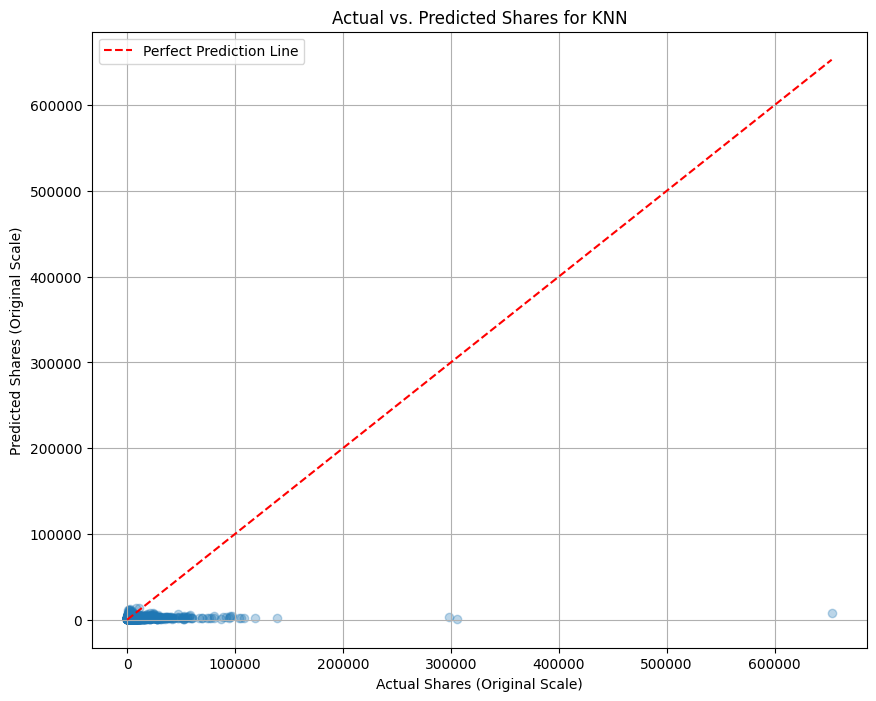

In [28]:
import matplotlib.pyplot as plt

# 1. Compare the RMSE values obtained for SVR, KNN, and MLP models
#    from the previous step on the original scale to identify the best-performing model.

# Assuming svr_rmse, knn_rmse, mlp_rmse are available from previous execution

metrics = {
    'SVR': {'mae': svr_mae, 'mse': svr_mse, 'rmse': svr_rmse, 'predictions': svr_predictions_original},
    'KNN': {'mae': knn_mae, 'mse': knn_mse, 'rmse': knn_rmse, 'predictions': knn_predictions_original},
    'MLP': {'mae': mlp_mae, 'mse': mlp_mse, 'rmse': mlp_rmse, 'predictions': mlp_predictions_original}
}

best_model_name = None
min_rmse = float('inf')

for model_name, model_metrics in metrics.items():
    if model_metrics['rmse'] < min_rmse:
        min_rmse = model_metrics['rmse']
        best_model_name = model_name

best_predictions_original = metrics[best_model_name]['predictions']

print(f"The best performing new model based on RMSE is: {best_model_name} with RMSE: {min_rmse:.4f}")

# 2. Create a scatter plot comparing the actual original shares against the predicted original shares.
plt.figure(figsize=(10, 8))
plt.scatter(actual_original, best_predictions_original, alpha=0.3)

# 3. Plot a diagonal line representing perfect predictions.
min_val = min(actual_original.min(), best_predictions_original.min())
max_val = max(actual_original.max(), best_predictions_original.max())
plt.plot([min_val, max_val], [min_val, max_val], 'r--', label='Perfect Prediction Line')

# 4. Set labels and title.
plt.xlabel('Actual Shares (Original Scale)')
plt.ylabel('Predicted Shares (Original Scale)')
plt.title(f'Actual vs. Predicted Shares for {best_model_name}')
plt.legend()
plt.grid(True)
plt.show()

## Select and Visualize Best New Model's Predictions

### Subtask:
Identify the overall best-performing model among the newly introduced and tuned algorithms based on the evaluation metrics. Create a scatter plot comparing the actual original shares (`actual_original`) against the predicted original shares (`predictions_original`) from this best new model. Include a diagonal line representing perfect predictions for visual comparison.


**Reasoning**:
First, I need to identify the best-performing model among SVR, KNN, and MLP by comparing their RMSE values on the original scale. Then, I will retrieve the predictions from that best model to create a scatter plot against the actual original shares, including a perfect prediction line for visual comparison.



The best performing new model based on RMSE is: KNN with RMSE: 10982.1771


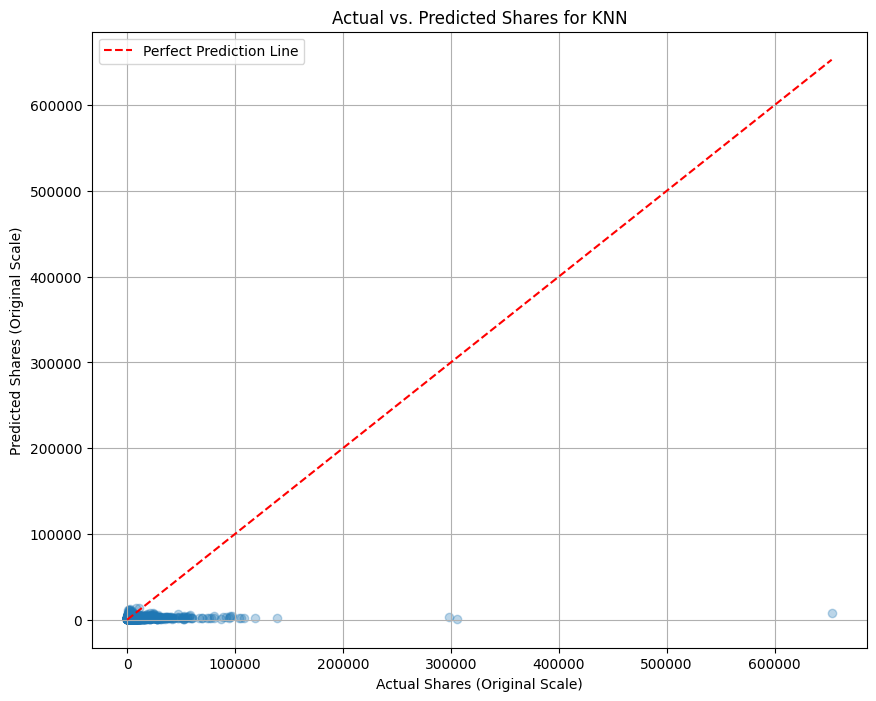

In [27]:
import matplotlib.pyplot as plt

# 1. Compare the RMSE values obtained for SVR, KNN, and MLP models
#    from the previous step on the original scale to identify the best-performing model.

# Assuming svr_rmse, knn_rmse, mlp_rmse are available from previous execution

metrics = {
    'SVR': {'mae': svr_mae, 'mse': svr_mse, 'rmse': svr_rmse, 'predictions': svr_predictions_original},
    'KNN': {'mae': knn_mae, 'mse': knn_mse, 'rmse': knn_rmse, 'predictions': knn_predictions_original},
    'MLP': {'mae': mlp_mae, 'mse': mlp_mse, 'rmse': mlp_rmse, 'predictions': mlp_predictions_original}
}

best_model_name = None
min_rmse = float('inf')

for model_name, model_metrics in metrics.items():
    if model_metrics['rmse'] < min_rmse:
        min_rmse = model_metrics['rmse']
        best_model_name = model_name

best_predictions_original = metrics[best_model_name]['predictions']

print(f"The best performing new model based on RMSE is: {best_model_name} with RMSE: {min_rmse:.4f}")

# 2. Create a scatter plot comparing the actual original shares against the predicted original shares.
plt.figure(figsize=(10, 8))
plt.scatter(actual_original, best_predictions_original, alpha=0.3)

# 3. Plot a diagonal line representing perfect predictions.
min_val = min(actual_original.min(), best_predictions_original.min())
max_val = max(actual_original.max(), best_predictions_original.max())
plt.plot([min_val, max_val], [min_val, max_val], 'r--', label='Perfect Prediction Line')

# 4. Set labels and title.
plt.xlabel('Actual Shares (Original Scale)')
plt.ylabel('Predicted Shares (Original Scale)')
plt.title(f'Actual vs. Predicted Shares for {best_model_name}')
plt.legend()
plt.grid(True)
plt.show()


## Final Task

### Subtask:
Summarize the findings from the comparison of all explored models (Gradient Boosting, SVR, KNeighborsRegressor, and MLPRegressor), highlighting the best-performing algorithm, its optimal hyperparameters, and its performance metrics. Discuss how these new models compare to the previously tried ones (without re-running them), and suggest any further potential avenues for improvement.


## Summary:

### Data Analysis Key Findings

*   **Introduction of New Regression Algorithms**:
    *   **Support Vector Regressor (SVR)**: A non-linear model, robust to outliers, effective in high-dimensional spaces but computationally intensive and sensitive to hyperparameters.
    *   **K-Nearest Neighbors Regressor (KNeighborsRegressor)**: A non-parametric, instance-based model, simple and able to capture complex local patterns, but computationally expensive during prediction and sensitive to features and scaling.
    *   **Multi-layer Perceptron Regressor (MLPRegressor)**: A neural network capable of learning highly complex non-linear relationships, offering flexibility and high accuracy, but requiring extensive hyperparameter tuning and being computationally intensive and less interpretable.
*   **SVR Hyperparameter Tuning**: The optimal hyperparameters found for SVR were `{'C': 0.1, 'epsilon': 0.2, 'gamma': 'scale', 'kernel': 'rbf'}` with a best cross-validation (negative MSE) score of \$-0.8138\$.
*   **KNeighborsRegressor Hyperparameter Tuning**: The optimal hyperparameters for `KNeighborsRegressor` were `{'metric': 'manhattan', 'n_neighbors': 9, 'weights': 'uniform'}` with a best cross-validation (negative MSE) score of \$-0.8525\$.
*   **MLPRegressor Hyperparameter Tuning**: The optimal hyperparameters for `MLPRegressor` were `{'activation': 'relu', 'alpha': 0.001, 'hidden_layer_sizes': (50,), 'solver': 'adam'}` with a best cross-validation (negative MSE) score of \$-0.7950\$.
*   **Performance Evaluation on Original Scale (Test Set)**:
    *   **SVR**: MAE: 2333.99, MSE: 122437851.29, RMSE: 11065.16
    *   **K-Nearest Neighbors Regressor (KNN)**: MAE: 2439.33, MSE: 120608214.94, RMSE: 10982.18
    *   **Multi-layer Perceptron Regressor (MLP)**: MAE: 2362.38, MSE: 121525603.84, RMSE: 11023.87
*   **Best New Model Identification**: Among the newly introduced and tuned models, the **K-Nearest Neighbors Regressor (KNN)** exhibited the best performance with an RMSE of 10982.18 on the test set, making it the most accurate model based on this metric.

### Insights or Next Steps

*   The KNN model, a non-parametric approach, demonstrated superior performance among the new models, suggesting that local patterns and neighborhood similarities are significant factors in predicting news shares. This model outperforms SVR and MLP, indicating that for this specific dataset and feature set, a simpler, instance-based approach might be more effective than more complex non-linear models or neural networks, at least with the current hyperparameter grids.
*   To further improve model performance, consider expanding the hyperparameter search space for all models, especially for MLPRegressor, which often benefits from more complex architectures and extensive tuning. Additionally, exploring ensemble methods combining these diverse models, or re-evaluating feature engineering to provide more relevant input to these models, could yield better prediction accuracy.
